In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

origin_file = "../data/immoweb-dataset.csv"
cleaned_file = "../data/cleaned_data.csv"
cleaned_file_modified = "../data/cleaned_data_modified.csv"
df = pd.read_csv(origin_file)
df_cleaned = pd.read_csv(cleaned_file_modified)

In [87]:
def filter_outliers(df, column='price_per_m2'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filtered_df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    return filtered_df

houses_df = df_cleaned[df_cleaned['type'] == 'HOUSE']
apt_df = df_cleaned[df_cleaned['type'] == 'APARTMENT']

houses_filtered = filter_outliers(houses_df)
apt_filtered = filter_outliers(apt_df)

In [98]:
df_cleaned_filtered = filter_outliers(df_cleaned)

grouped = df_cleaned.groupby(['region', 'municipality']).agg(
    avg_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_m2=('price_per_m2', 'mean')
).reset_index()

top_be = grouped.sort_values('price_per_m2', ascending=False).head(5)
print(top_be)

      region         municipality      avg_price  median_price  price_per_m2
1   Brussels            Auderghem  623778.980892      449000.0   4587.897362
12  Brussels         Saint-Gilles  799740.689904      554500.0   4563.206809
8   Brussels              Ixelles  738250.944822      495000.0   4503.426890
15  Brussels                Uccle  911182.225806      635000.0   4442.571322
18  Brussels  Woluwe-Saint-Pierre  826626.779661      630000.0   4215.003019


In [100]:
top_wal = grouped[grouped['region'] == 'Wallonia'].sort_values('price_per_m2', ascending=False).head(5)
print(top_wal)

       region                municipality     avg_price  median_price  \
227  Wallonia                      Raeren  6.779231e+05      545000.0   
167  Wallonia                       Lasne  1.290522e+06     1147500.0   
212  Wallonia  Ottignies-Louvain-la-Neuve  4.612924e+05      395000.0   
81   Wallonia            Chaumont-Gistoux  6.571067e+05      599000.0   
282  Wallonia                    Waterloo  6.641426e+05      545000.0   

     price_per_m2  
227   3685.453518  
167   3610.592028  
212   3603.172511  
81    3498.969693  
282   3493.981709  


In [101]:
top_fla = grouped[grouped['region'] == 'Flanders'].sort_values('price_per_m2', ascending=False).head(5)
print(top_fla)

      region        municipality     avg_price  median_price  price_per_m2
28  Flanders  Rhode-Saint-Genèse  1.431486e+06      825000.0   3918.653273
24  Flanders            Kraainem  8.893913e+05      635000.0   3913.373569
30  Flanders     Wezembeek-Oppem  6.598143e+05      572500.0   3717.548287
25  Flanders           Linkebeek  6.386429e+05      545000.0   3171.634589
29  Flanders              Wemmel  6.202320e+05      525000.0   2911.915401


In [102]:
bottom_be = grouped.sort_values('price_per_m2', ascending=True).head(5)
print(bottom_be)

       region municipality      avg_price  median_price  price_per_m2
225  Wallonia    Quiévrain  168944.444444      155000.0   1057.884631
88   Wallonia  Colfontaine  147731.970588      145000.0   1116.666934
193  Wallonia    Momignies  200461.538462      200000.0   1119.043538
101  Wallonia         Dour  183766.666667      169500.0   1167.107602
224  Wallonia    Quaregnon  169932.586957      149999.5   1188.510873


In [103]:
bottom_wal = grouped[grouped['region'] == 'Wallonia'].sort_values('price_per_m2', ascending=True).head(5)
print(bottom_wal)

       region municipality      avg_price  median_price  price_per_m2
225  Wallonia    Quiévrain  168944.444444      155000.0   1057.884631
88   Wallonia  Colfontaine  147731.970588      145000.0   1116.666934
193  Wallonia    Momignies  200461.538462      200000.0   1119.043538
101  Wallonia         Dour  183766.666667      169500.0   1167.107602
224  Wallonia    Quaregnon  169932.586957      149999.5   1188.510873


In [104]:
bottom_fla= grouped[grouped['region'] == 'Flanders'].sort_values('price_per_m2', ascending=True).head(5)
print(bottom_fla)

      region       municipality      avg_price  median_price  price_per_m2
21  Flanders  Espierres-Helchin  236787.500000      254000.0   1398.995027
26  Flanders           Messines  428125.000000      259000.0   1470.802883
19  Flanders            Biévène  450542.538462      425000.0   1888.797160
27  Flanders             Renaix  315703.775735      266800.0   2103.971652
22  Flanders            Fourons  463964.285714      260000.0   2104.755864


   Category         municipality    region      avg_price  median_price  \
0     Top 5            Auderghem  Brussels  623778.980892      449000.0   
1     Top 5         Saint-Gilles  Brussels  799740.689904      554500.0   
2     Top 5              Ixelles  Brussels  738250.944822      495000.0   
3     Top 5                Uccle  Brussels  911182.225806      635000.0   
4     Top 5  Woluwe-Saint-Pierre  Brussels  826626.779661      630000.0   
5  Bottom 5            Quiévrain  Wallonia  168944.444444      155000.0   
6  Bottom 5          Colfontaine  Wallonia  147731.970588      145000.0   
7  Bottom 5            Momignies  Wallonia  200461.538462      200000.0   
8  Bottom 5                 Dour  Wallonia  183766.666667      169500.0   
9  Bottom 5            Quaregnon  Wallonia  169932.586957      149999.5   

   price_per_m2  
0   4587.897362  
1   4563.206809  
2   4503.426890  
3   4442.571322  
4   4215.003019  
5   1057.884631  
6   1116.666934  
7   1119.043538  
8   1167.107

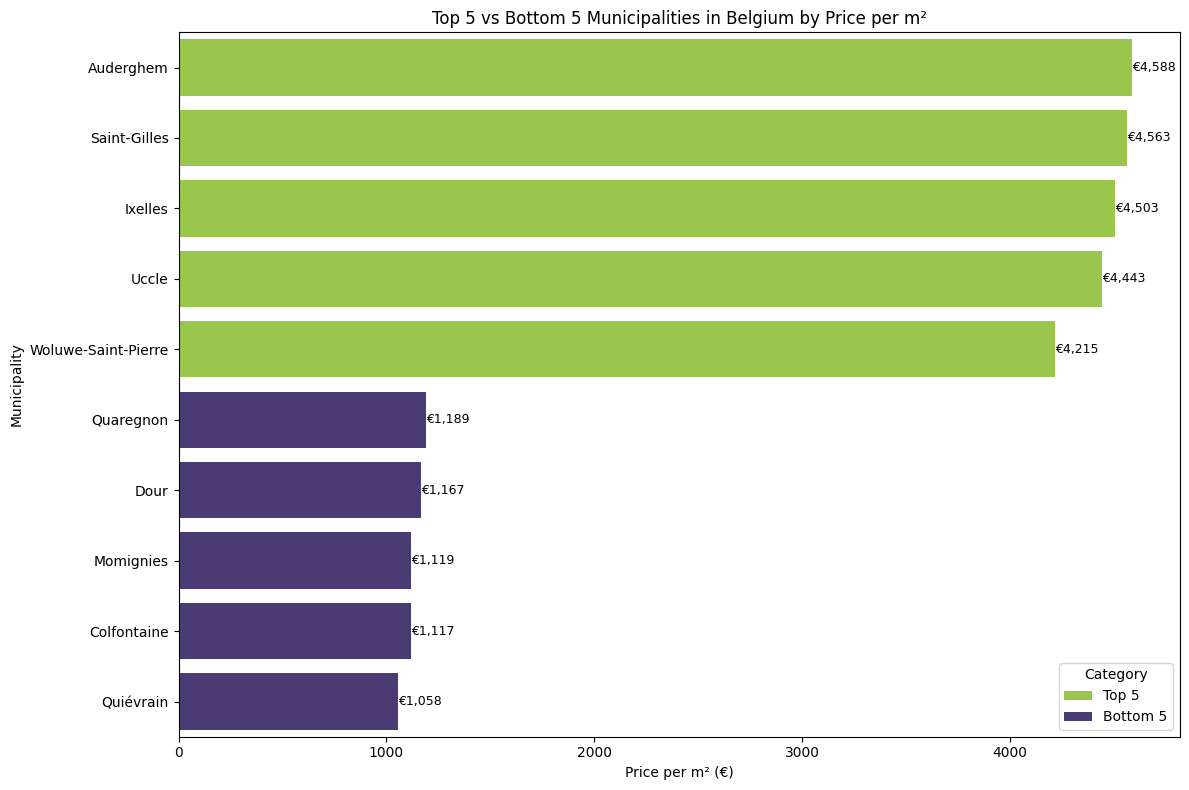

In [ ]:
top_be['Category'] = 'Top 5'
bottom_be['Category'] = 'Bottom 5'

combined_be = pd.concat([top_be, bottom_be], ignore_index=True)
combined_be = combined_be[combined_be['price_per_m2'] > 0]

print(combined_be[['Category', 'municipality', 'region', 'avg_price', 'median_price', 'price_per_m2']])
# combined_be.style.format({
#     'avg_price': '€{:,.0f}',
#     'median_price': '€{:,.0f}',
#     'price_per_m2': '€{:,.2f}'
# })

plt.figure(figsize=(12, 8))

combined_be = combined_be.sort_values(by=['Category', 'price_per_m2'], ascending=[False, False])
viridis = sns.color_palette("viridis", as_cmap=False)
top_color = viridis[-1]   
bottom_color = viridis[0] 
palette = {'Top 5': top_color, 'Bottom 5': bottom_color}

ax =sns.barplot(
    data=combined_be,
    y='municipality',
    x='price_per_m2',
    hue='Category',
    palette=palette
)

plt.title('Top 5 vs Bottom 5 Municipalities in Belgium by Price per m²')
plt.xlabel('Price per m² (€)')
plt.ylabel('Municipality')
plt.legend(title='Category')

for p in ax.patches:
    width = p.get_width()
    if width > 10:
        ax.text(
        width,                    
        p.get_y() + p.get_height()/2, 
        f'€{width:,.0f}',             
        va='center',
        fontsize=9
    )
    
    
plt.tight_layout()
plt.show()





   Category        municipality    region     avg_price  median_price  \
0     Top 5  Rhode-Saint-Genèse  Flanders  1.431486e+06      825000.0   
1     Top 5            Kraainem  Flanders  8.893913e+05      635000.0   
2     Top 5     Wezembeek-Oppem  Flanders  6.598143e+05      572500.0   
3     Top 5           Linkebeek  Flanders  6.386429e+05      545000.0   
4     Top 5              Wemmel  Flanders  6.202320e+05      525000.0   
5  Bottom 5   Espierres-Helchin  Flanders  2.367875e+05      254000.0   
6  Bottom 5            Messines  Flanders  4.281250e+05      259000.0   
7  Bottom 5             Biévène  Flanders  4.505425e+05      425000.0   
8  Bottom 5              Renaix  Flanders  3.157038e+05      266800.0   
9  Bottom 5             Fourons  Flanders  4.639643e+05      260000.0   

   price_per_m2  
0   3918.653273  
1   3913.373569  
2   3717.548287  
3   3171.634589  
4   2911.915401  
5   1398.995027  
6   1470.802883  
7   1888.797160  
8   2103.971652  
9   2104.755864 

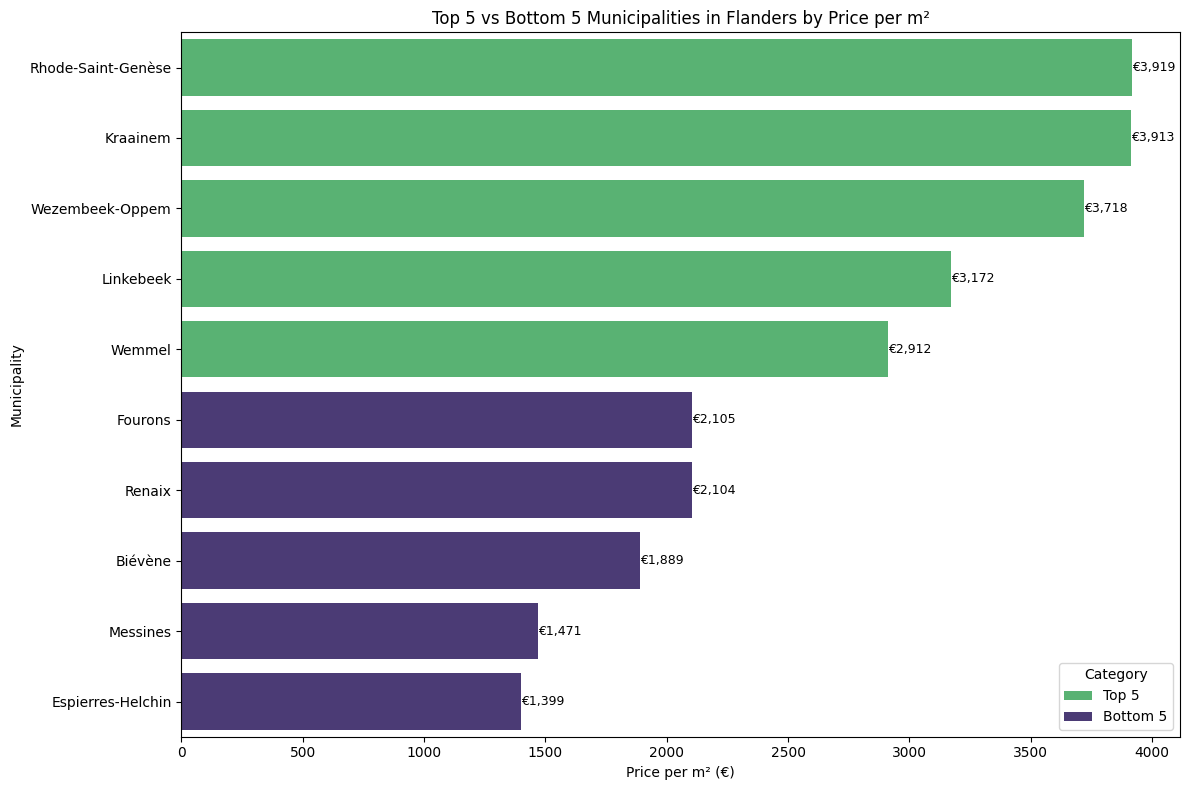

In [139]:
top_fla['Category'] = 'Top 5'
bottom_fla['Category'] = 'Bottom 5'

combined_fla = pd.concat([top_fla, bottom_fla], ignore_index=True)
combined_fla = combined_fla[combined_fla['price_per_m2'] > 0]

print(combined_fla[['Category', 'municipality', 'region', 'avg_price', 'median_price', 'price_per_m2']])

plt.figure(figsize=(12, 8))

combined_fla = combined_fla.sort_values(by=['Category', 'price_per_m2'], ascending=[False, False])
viridis = sns.color_palette("viridis", as_cmap=False)
top_color = viridis[-2]   
bottom_color = viridis[0] 
palette = {'Top 5': top_color, 'Bottom 5': bottom_color}

ax =sns.barplot(
    data=combined_fla,
    y='municipality',
    x='price_per_m2',
    hue='Category',
    palette=palette
)

plt.title('Top 5 vs Bottom 5 Municipalities in Flanders by Price per m²')
plt.xlabel('Price per m² (€)')
plt.ylabel('Municipality')
plt.legend(title='Category')

for p in ax.patches:
    width = p.get_width()
    if width > 10:
        ax.text(
        width,                    
        p.get_y() + p.get_height()/2, 
        f'€{width:,.0f}',             
        va='center',
        fontsize=9
    )
    
    
plt.tight_layout()
plt.show()

   Category        municipality    region     avg_price  median_price  \
0     Top 5  Rhode-Saint-Genèse  Flanders  1.431486e+06      825000.0   
1     Top 5            Kraainem  Flanders  8.893913e+05      635000.0   
2     Top 5     Wezembeek-Oppem  Flanders  6.598143e+05      572500.0   
3     Top 5           Linkebeek  Flanders  6.386429e+05      545000.0   
4     Top 5              Wemmel  Flanders  6.202320e+05      525000.0   
5  Bottom 5   Espierres-Helchin  Flanders  2.367875e+05      254000.0   
6  Bottom 5            Messines  Flanders  4.281250e+05      259000.0   
7  Bottom 5             Biévène  Flanders  4.505425e+05      425000.0   
8  Bottom 5              Renaix  Flanders  3.157038e+05      266800.0   
9  Bottom 5             Fourons  Flanders  4.639643e+05      260000.0   

   price_per_m2  
0   3918.653273  
1   3913.373569  
2   3717.548287  
3   3171.634589  
4   2911.915401  
5   1398.995027  
6   1470.802883  
7   1888.797160  
8   2103.971652  
9   2104.755864 

/var/folders/6k/0qvxrpnd0rd_bcv5419k929r0000gn/T/ipykernel_39356/2519266832.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  combined_wal= combined_wal[combined_fla['price_per_m2'] > 0]


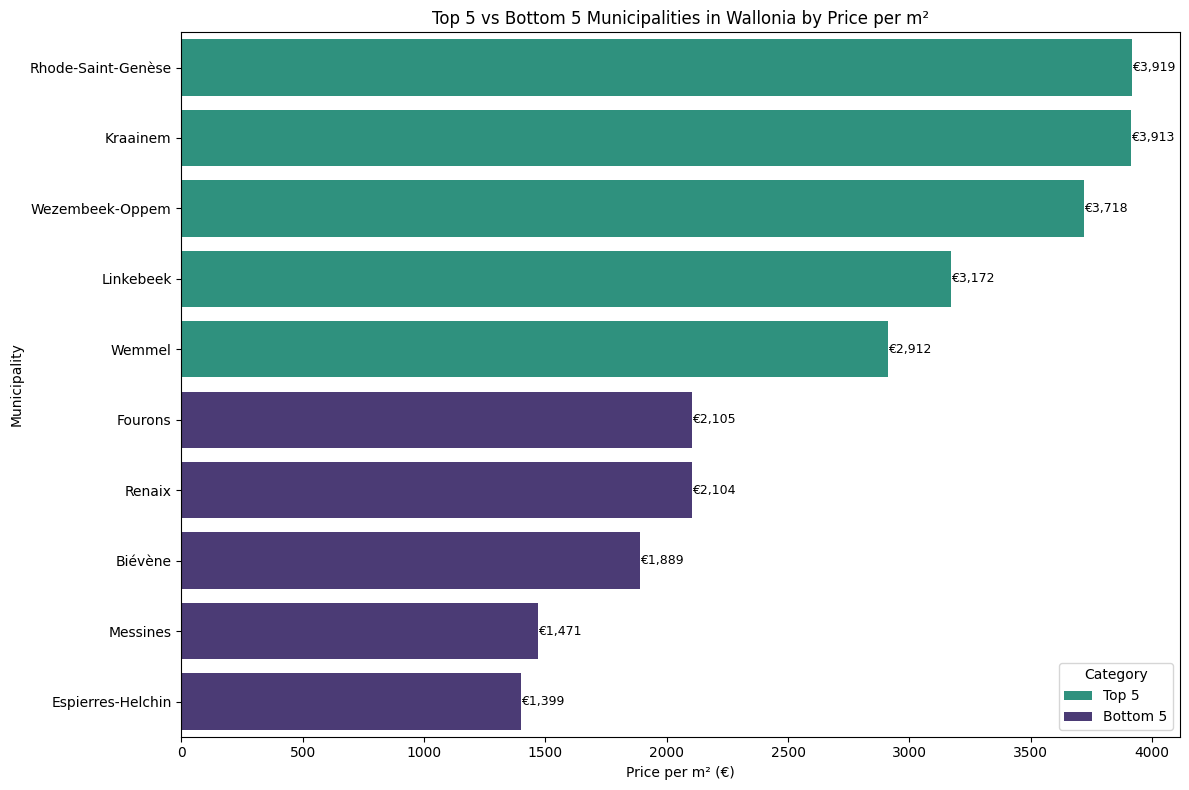

In [141]:
top_wal['Category'] = 'Top 5'
bottom_wal['Category'] = 'Bottom 5'

combined_wal = pd.concat([top_fla, bottom_fla], ignore_index=True)
combined_wal= combined_wal[combined_fla['price_per_m2'] > 0]

print(combined_wal[['Category', 'municipality', 'region', 'avg_price', 'median_price', 'price_per_m2']])

plt.figure(figsize=(12, 8))

combined_wal = combined_wal.sort_values(by=['Category', 'price_per_m2'], ascending=[False, False])
viridis = sns.color_palette("viridis", as_cmap=False)
top_color = viridis[-3]   
bottom_color = viridis[0] 
palette = {'Top 5': top_color, 'Bottom 5': bottom_color}

ax =sns.barplot(
    data=combined_wal,
    y='municipality',
    x='price_per_m2',
    hue='Category',
    palette=palette
)

plt.title('Top 5 vs Bottom 5 Municipalities in Wallonia by Price per m²')
plt.xlabel('Price per m² (€)')
plt.ylabel('Municipality')
plt.legend(title='Category')

for p in ax.patches:
    width = p.get_width()
    if width > 10:
        ax.text(
        width,                    
        p.get_y() + p.get_height()/2, 
        f'€{width:,.0f}',             
        va='center',
        fontsize=9
    )
    
    
plt.tight_layout()
plt.show()

In [105]:
region_median_prices_apt = apt_filtered.groupby(['region', 'municipality'])['price_per_m2'].median().reset_index()
top_by_region_apt = region_median_prices_apt.sort_values(['region', 'price_per_m2'], ascending=[True, False])
top5_each_region_apt = top_by_region_apt.groupby('region').head(5)

print(top5_each_region_apt)

       region                municipality  price_per_m2
1    Brussels                   Auderghem   4398.190045
12   Brussels                Saint-Gilles   4349.315068
4    Brussels                   Etterbeek   4285.714286
8    Brussels                     Ixelles   4264.823718
17   Brussels        Woluwe-Saint-Lambert   4154.929577
21   Flanders                    Kraainem   4272.727273
26   Flanders             Wezembeek-Oppem   3868.421053
19   Flanders                   Drogenbos   3357.142857
24   Flanders          Rhode-Saint-Genèse   3277.777778
22   Flanders                   Linkebeek   3272.576636
136  Wallonia                       Lasne   4916.666667
188  Wallonia                      Raeren   4666.361416
67   Wallonia            Chaumont-Gistoux   4552.845528
61   Wallonia                  Butgenbach   4424.778761
174  Wallonia  Ottignies-Louvain-la-Neuve   4344.982079


In [66]:
print(top5_each_region_apt["municipality"])

1                       Auderghem
12                   Saint-Gilles
4                       Etterbeek
8                         Ixelles
17           Woluwe-Saint-Lambert
21                       Kraainem
26                Wezembeek-Oppem
19                      Drogenbos
24             Rhode-Saint-Genèse
22                      Linkebeek
136                         Lasne
188                        Raeren
67               Chaumont-Gistoux
61                     Butgenbach
174    Ottignies-Louvain-la-Neuve
Name: municipality, dtype: object


In [67]:

bottom_by_region_apt = region_median_prices_apt.sort_values(['region', 'price_per_m2'], ascending=[True, True])
bottom5_each_region_apt = bottom_by_region_apt.groupby('region').head(5)

print(bottom5_each_region_apt)

       region           municipality  price_per_m2
11   Brussels   Molenbeek-Saint-Jean   2589.298370
10   Brussels             Koekelberg   2651.996528
7    Brussels              Ganshoren   2722.772277
9    Brussels                  Jette   2867.460317
2    Brussels  Berchem-Sainte-Agathe   2937.500000
20   Flanders                Fourons   2147.727273
23   Flanders                 Renaix   2654.655612
25   Flanders                 Wemmel   2965.099715
22   Flanders              Linkebeek   3272.576636
24   Flanders     Rhode-Saint-Genèse   3277.777778
117  Wallonia                Hensies    921.052632
180  Wallonia          Philippeville    963.414634
120  Wallonia              Honnelles   1000.000000
81   Wallonia                  Dison   1068.965517
152  Wallonia                Marchin   1085.365854


In [68]:
region_median_prices_house = houses_filtered.groupby(['region', 'municipality'])['price_per_m2'].median().reset_index()
top_by_region_house = region_median_prices_house.sort_values(['region', 'price_per_m2'], ascending=[True, False])
top5_each_region_house = top_by_region_house.groupby('region').head(5)

print(top5_each_region_house)

       region         municipality  price_per_m2
16   Brussels  Watermael-Boitsfort   3425.000000
18   Brussels  Woluwe-Saint-Pierre   3378.378378
1    Brussels            Auderghem   3261.904762
15   Brussels                Uccle   3256.447453
8    Brussels              Ixelles   3232.218310
30   Flanders      Wezembeek-Oppem   3550.708700
24   Flanders             Kraainem   3316.955267
28   Flanders   Rhode-Saint-Genèse   3170.634921
29   Flanders               Wemmel   2842.857143
25   Flanders            Linkebeek   2531.914894
167  Wallonia                Lasne   3365.388046
227  Wallonia               Raeren   3035.019455
232  Wallonia            Rixensart   2981.735452
282  Wallonia             Waterloo   2959.183673
81   Wallonia     Chaumont-Gistoux   2935.000000


In [34]:
bottom_by_region_house = region_median_prices_house.sort_values(['region', 'price_per_m2'], ascending=[True, True])
bottom5_each_region_house = bottom_by_region_house.groupby('region').head(5)

print(bottom5_each_region_house)

       region          municipality  price_per_m2
11   Brussels  Molenbeek-Saint-Jean   2256.630398
0    Brussels            Anderlecht   2381.301325
14   Brussels            Schaerbeek   2395.480980
9    Brussels                 Jette   2488.709677
10   Brussels            Koekelberg   2493.750000
26   Flanders              Messines   1470.725575
27   Flanders                Renaix   1528.205128
21   Flanders     Espierres-Helchin   1573.362299
22   Flanders               Fourons   1585.294118
19   Flanders               Biévène   1673.228346
57   Wallonia              Bertogne    859.139785
58   Wallonia               Bertrix    960.227273
225  Wallonia             Quiévrain    963.302752
193  Wallonia             Momignies   1000.000000
105  Wallonia           Erquelinnes   1010.273973


In [69]:
def filter_outliers(df, column='price'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filtered_df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    return filtered_df

houses_df = df_cleaned[df_cleaned['type'] == 'HOUSE']
apt_df = df_cleaned[df_cleaned['type'] == 'APARTMENT']

houses_filtered = filter_outliers(houses_df)
apt_filtered = filter_outliers(apt_df)

region_median_prices_apt = apt_filtered.groupby(['region', 'municipality'])['price'].agg(["mean", "median"]).reset_index()
top_by_region_apt_mean = region_median_prices_apt.sort_values(['region', 'mean'], ascending=[True, False])
top_by_region_apt_median = region_median_prices_apt.sort_values(['region', 'median'], ascending=[True, False])


top5_each_region_apt_mean = top_by_region_apt_mean.groupby('region').head(5)
top5_each_region_apt_median = top_by_region_apt_median.groupby('region').head(5)
print("Top 5 Apartments by Mean Price:")
print(top5_each_region_apt_mean[["region","municipality","mean"]])

Top 5 Apartments by Mean Price:
       region          municipality           mean
18   Brussels   Woluwe-Saint-Pierre  424288.435374
15   Brussels                 Uccle  394730.048969
17   Brussels  Woluwe-Saint-Lambert  387005.576744
16   Brussels   Watermael-Boitsfort  383153.846154
12   Brussels          Saint-Gilles  380256.926625
26   Flanders       Wezembeek-Oppem  445045.454545
21   Flanders              Kraainem  436133.333333
24   Flanders    Rhode-Saint-Genèse  352863.636364
19   Flanders             Drogenbos  349400.000000
23   Flanders                Renaix  308038.779070
172  Wallonia                 Oreye  495000.000000
67   Wallonia      Chaumont-Gistoux  486272.727273
188  Wallonia                Raeren  453000.000000
214  Wallonia    Thimister-Clermont  404333.333333
168  Wallonia                Neupré  401509.444444


In [70]:
print("Top 5 Apartments by Median Price:")
print(top5_each_region_apt_median[["region","municipality","median"]])

Top 5 Apartments by Median Price:
       region         municipality    median
18   Brussels  Woluwe-Saint-Pierre  398000.0
8    Brussels              Ixelles  375000.0
16   Brussels  Watermael-Boitsfort  372500.0
12   Brussels         Saint-Gilles  370000.0
15   Brussels                Uccle  370000.0
26   Flanders      Wezembeek-Oppem  487500.0
21   Flanders             Kraainem  425000.0
24   Flanders   Rhode-Saint-Genèse  327500.0
19   Flanders            Drogenbos  320000.0
25   Flanders               Wemmel  275000.0
172  Wallonia                Oreye  495000.0
222  Wallonia             Vielsalm  475000.0
67   Wallonia     Chaumont-Gistoux  465000.0
188  Wallonia               Raeren  462000.0
168  Wallonia               Neupré  432500.0


In [71]:
bottom_by_region_apt_mean = region_median_prices_apt.sort_values(['region', 'mean'], ascending=[True, True])
bottom_by_region_apt_median = region_median_prices_apt.sort_values(['region', 'median'], ascending=[True, True])


bottom5_each_region_apt_mean = bottom_by_region_apt_mean.groupby('region').head(5)
bottom5_each_region_apt_median = bottom_by_region_apt_median.groupby('region').head(5)
print("Bottom 5 by Mean Price:")
print(bottom5_each_region_apt_mean[["region","municipality","mean"]])

Bottom 5 by Mean Price:
       region          municipality           mean
7    Brussels             Ganshoren  242972.592593
9    Brussels                 Jette  252698.295455
11   Brussels  Molenbeek-Saint-Jean  254121.014124
0    Brussels            Anderlecht  254921.269488
10   Brussels            Koekelberg  274867.857143
20   Flanders               Fourons  174000.000000
25   Flanders                Wemmel  275000.000000
22   Flanders             Linkebeek  279166.666667
23   Flanders                Renaix  308038.779070
19   Flanders             Drogenbos  349400.000000
227  Wallonia     Vresse-sur-Semois   51000.000000
117  Wallonia               Hensies   70000.000000
180  Wallonia         Philippeville   79000.000000
152  Wallonia               Marchin   89000.000000
203  Wallonia           Sivry-Rance   95000.000000


In [72]:

print("Bottom 5 by Median Price:")
print(bottom5_each_region_apt_median[["region","municipality","median"]])

Bottom 5 by Median Price:
       region          municipality    median
7    Brussels             Ganshoren  235000.0
11   Brussels  Molenbeek-Saint-Jean  237000.0
0    Brussels            Anderlecht  240000.0
9    Brussels                 Jette  240000.0
10   Brussels            Koekelberg  249000.0
20   Flanders               Fourons  174000.0
23   Flanders                Renaix  256000.0
22   Flanders             Linkebeek  260000.0
25   Flanders                Wemmel  275000.0
19   Flanders             Drogenbos  320000.0
227  Wallonia     Vresse-sur-Semois   51000.0
117  Wallonia               Hensies   70000.0
180  Wallonia         Philippeville   79000.0
184  Wallonia              Péruwelz   88500.0
152  Wallonia               Marchin   89000.0


In [73]:
region_median_prices_house = houses_filtered.groupby(['region', 'municipality'])['price'].agg(["mean", "median"]).reset_index()
top_by_region_house_mean = region_median_prices_house.sort_values(['region', 'mean'], ascending=[True, False])
top_by_region_house_median = region_median_prices_house.sort_values(['region', 'median'], ascending=[True, False])


top5_each_region_house_mean = top_by_region_house_mean.groupby('region').head(5)
top5_each_region_house_median = top_by_region_house_median.groupby('region').head(5)
print("Top 5 Houses by Mean Price:")
print(top5_each_region_house_mean[["region","municipality","mean"]])

Top 5 Houses by Mean Price:
       region          municipality           mean
18   Brussels   Woluwe-Saint-Pierre  714043.103448
17   Brussels  Woluwe-Saint-Lambert  708510.638298
16   Brussels   Watermael-Boitsfort  692571.428571
12   Brussels          Saint-Gilles  692516.666667
8    Brussels               Ixelles  680282.352941
23   Flanders             Herstappe  700000.000000
30   Flanders       Wezembeek-Oppem  647000.000000
28   Flanders    Rhode-Saint-Genèse  613269.230769
24   Flanders              Kraainem  605354.838710
25   Flanders             Linkebeek  580125.000000
227  Wallonia                Raeren  669666.666667
167  Wallonia                 Lasne  640608.695652
43   Wallonia                Attert  622823.529412
81   Wallonia      Chaumont-Gistoux  618144.649123
282  Wallonia              Waterloo  575947.826087


In [74]:

print("Top 5 Houses by Median Price:")
print(top5_each_region_house_mean[["region","municipality","median"]])

Top 5 Houses by Median Price:
       region          municipality    median
18   Brussels   Woluwe-Saint-Pierre  732500.0
17   Brussels  Woluwe-Saint-Lambert  745000.0
16   Brussels   Watermael-Boitsfort  685000.0
12   Brussels          Saint-Gilles  697500.0
8    Brussels               Ixelles  695000.0
23   Flanders             Herstappe  700000.0
30   Flanders       Wezembeek-Oppem  599000.0
28   Flanders    Rhode-Saint-Genèse  559000.0
24   Flanders              Kraainem  595000.0
25   Flanders             Linkebeek  567500.0
227  Wallonia                Raeren  780000.0
167  Wallonia                 Lasne  675000.0
43   Wallonia                Attert  695000.0
81   Wallonia      Chaumont-Gistoux  599000.0
282  Wallonia              Waterloo  565000.0


In [75]:
bottom_by_region_house_mean = region_median_prices_house.sort_values(['region', 'mean'], ascending=[True, True])
bottom_by_region_house_median = region_median_prices_house.sort_values(['region', 'median'], ascending=[True, True])


bottom5_each_region_house_mean = bottom_by_region_house_mean .groupby('region').head(5)
bottom5_each_region_house_median = bottom_by_region_house_median.groupby('region').head(5)
print("Bottom 5 Houses by Mean Price:")
print(bottom5_each_region_house_mean[["region","municipality","mean"]])

Bottom 5 Houses by Mean Price:
       region           municipality           mean
11   Brussels   Molenbeek-Saint-Jean  477756.097561
10   Brussels             Koekelberg  496142.857143
0    Brussels             Anderlecht  503359.550562
9    Brussels                  Jette  516939.393939
2    Brussels  Berchem-Sainte-Agathe  524651.923077
21   Flanders      Espierres-Helchin  236787.500000
26   Flanders               Messines  253571.428571
27   Flanders                 Renaix  298407.098901
22   Flanders                Fourons  301944.444444
19   Flanders                Biévène  380171.083333
88   Wallonia            Colfontaine  146867.322581
225  Wallonia              Quiévrain  166379.310345
224  Wallonia              Quaregnon  171704.853659
142  Wallonia               Hastière  183948.377049
101  Wallonia                   Dour  184000.000000


In [76]:

print("Bottom 5 Houses by Median Price:")
print(bottom5_each_region_house_median[["region","municipality","median"]])

Bottom 5 Houses by Median Price:
       region           municipality    median
11   Brussels   Molenbeek-Saint-Jean  420000.0
10   Brussels             Koekelberg  436000.0
7    Brussels              Ganshoren  455000.0
0    Brussels             Anderlecht  460000.0
2    Brussels  Berchem-Sainte-Agathe  492500.0
26   Flanders               Messines  249000.0
22   Flanders                Fourons  249500.0
21   Flanders      Espierres-Helchin  254000.0
27   Flanders                 Renaix  273500.0
19   Flanders                Biévène  412000.0
142  Wallonia               Hastière  129000.0
256  Wallonia                 Tellin  130000.0
88   Wallonia            Colfontaine  143750.0
224  Wallonia              Quaregnon  149999.0
225  Wallonia              Quiévrain  155000.0


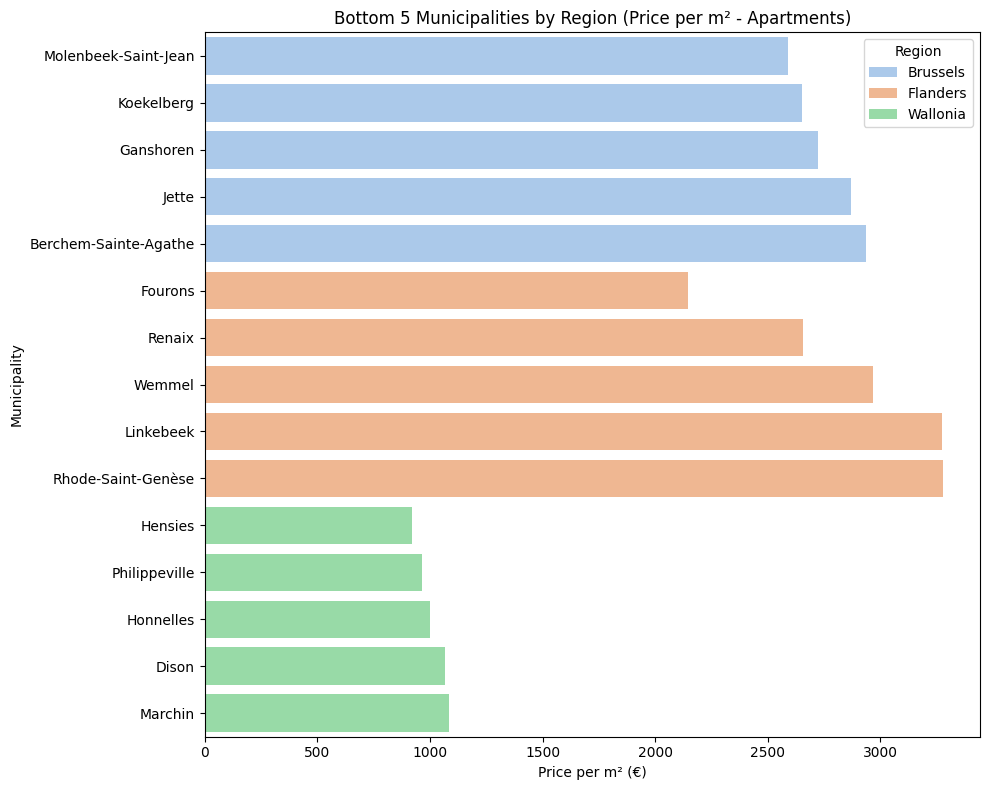

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(
    data=bottom5_each_region_apt,
    y='municipality',
    x='price_per_m2',
    hue='region',
    palette='pastel'
)
plt.title("Bottom 5 Municipalities by Region (Price per m² - Apartments)")
plt.xlabel("Price per m² (€)")
plt.ylabel("Municipality")
plt.legend(title='Region')
plt.tight_layout()
plt.show()


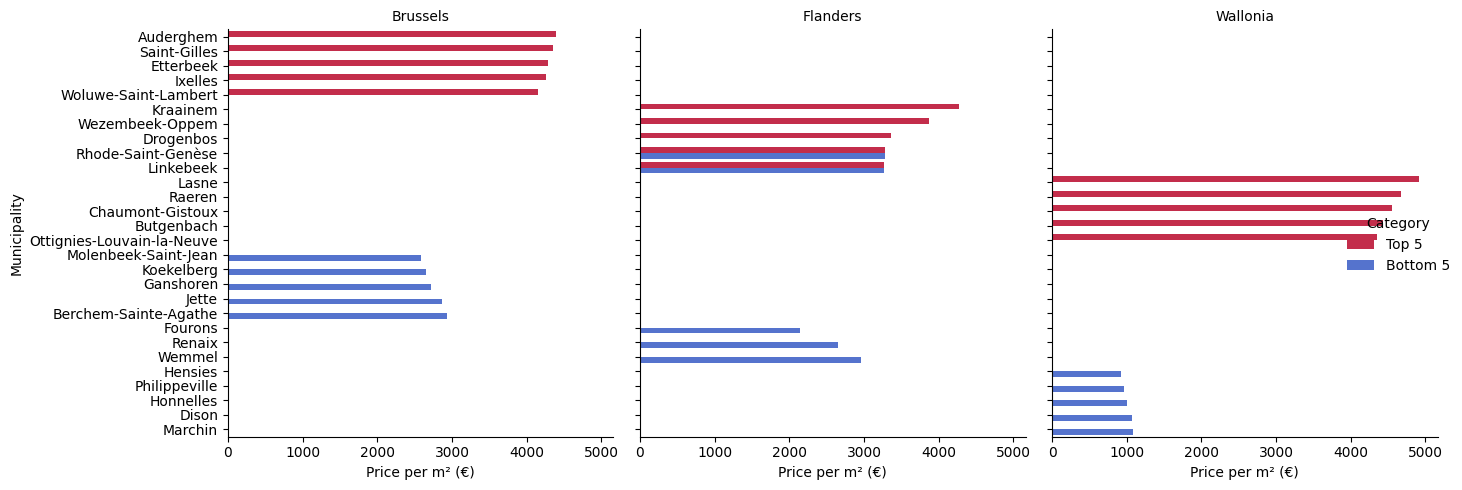

In [79]:
highlight_munis = pd.concat([
    top5_each_region_apt.assign(group='Top 5'),
    bottom5_each_region_apt.assign(group='Bottom 5')
])


highlight_munis['group'] = pd.Categorical(highlight_munis['group'], categories=['Top 5', 'Bottom 5'])

# Plot
g = sns.catplot(
    data=highlight_munis,
    kind='bar',
    col='region',
    y='municipality',
    x='price_per_m2',
    hue='group',
    palette={'Top 5': 'crimson', 'Bottom 5': 'royalblue'},
    height=5,
    aspect=0.9
)

g.set_titles("{col_name}")
g.set_axis_labels("Price per m² (€)", "Municipality")
g._legend.set_title("Category")
plt.tight_layout()
plt.show()




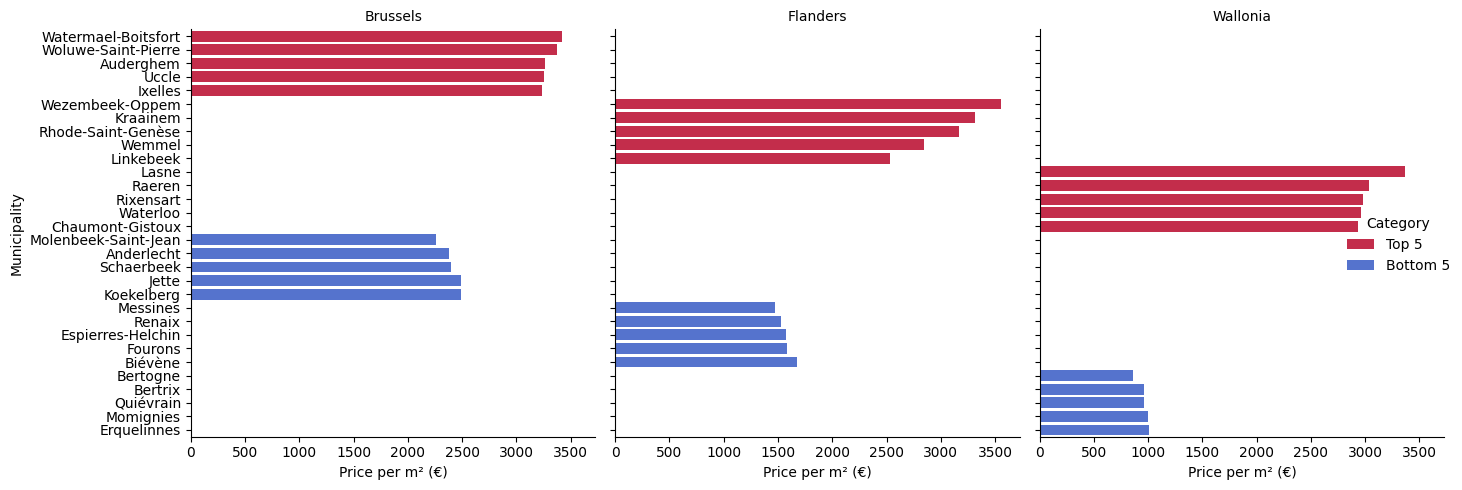

In [62]:
highlight_munis = pd.concat([
    top5_each_region_house.assign(group='Top 5'),
    bottom5_each_region_house.assign(group='Bottom 5')
])


highlight_munis['group'] = pd.Categorical(highlight_munis['group'], categories=['Top 5', 'Bottom 5'])

# Plot
g = sns.catplot(
    data=highlight_munis,
    kind='bar',
    col='region',
    y='municipality',
    x='price_per_m2',
    hue='group',
    palette={'Top 5': 'crimson', 'Bottom 5': 'royalblue'},
    height=5,
    aspect=0.9
)

g.set_titles("{col_name}")
g.set_axis_labels("Price per m² (€)", "Municipality")
g._legend.set_title("Category")
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `price_per_m2` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>